In [14]:
import os, sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

from annoy import AnnoyIndex
import random

In [4]:
import cloudpickle

def load_from_pkl( fpath ):
    frb = open(fpath, 'rb')
    obj = cloudpickle.loads(frb.read())
    return obj

def save_as_pkl( obj, fpath ):
    fwb = open( fpath, 'wb')
    tmp = fwb.write(cloudpickle.dumps(obj))
    return

In [3]:
 # read csv

df = pd.read_csv( '../../data/keyakizaka46_blog.csv' )
print(df.shape)

(16283, 5)


In [30]:
# load feature

image_dir = '../../data/images'
feature_dir = '../../feature'
fname = ('vgg_fc2',4096)
# fname = ('facenet',512)

X = np.empty((0,fname[1]), float)
image_list = []
dirs = os.listdir( image_dir )
for author in dirs[:3]:
    # print( author )
    X_tmp = load_from_pkl( '%s/image/%s/X_%s_%s.pkl' % (feature_dir, fname[0], fname[0], author) )
    X = np.append(X, X_tmp, axis=0)
    image_list_tmp = load_from_pkl( '%s/image/%s/imagelist_%s_%s.pkl' % (feature_dir, fname[0], fname[0], author) )
    image_list.extend( image_list_tmp )

原田葵
尾関梨香
織田奈那


In [31]:
# pca

pca = PCA(); pca.fit(X)
Xr = pca.fit_transform( X )

In [32]:
# annoy

f = 100
t = AnnoyIndex(f)
for i in range( X.shape[0] ):
    t.add_item(i, Xr[:,:f][i])

t.build(10)
# t.save('test.ann')

True

1 ../data/images/原田葵/mobp2CL3S.jpg 0.0


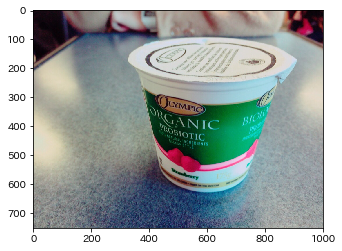

1624 ../data/images/原田葵/mobvBaQvG.jpg 0.46293750405311584


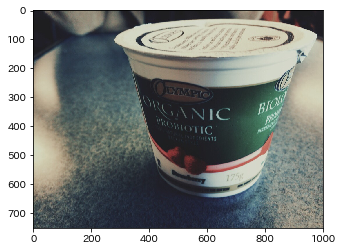

3626 ../data/images/織田奈那/mobRAvYru.jpg 0.610368013381958


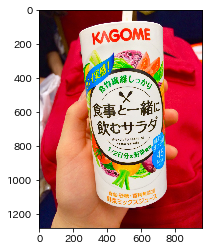

2823 ../data/images/織田奈那/mobAM3U4Z.jpg 0.697511613368988


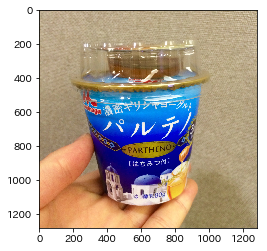

2016 ../data/images/尾関梨香/mobus5KHJ.jpg 0.7408247590065002


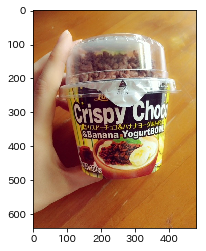

In [34]:


target = 1
k = 5
images, dists = t.get_nns_by_item(target, k, include_distances=True) # search_k=-1
for i in range( k ): # search_k=-1
    print( images[i], image_list[images[i]], dists[i] )
    im = Image.open(image_list[images[i]])
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.show()